We are working on Global Power Plant Database which is, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 13,298 power plants from 3 countries(USA, AUS, INDIA) and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

AIM-Making prediction
(1)Primary Fuel
(2)Capacity_mw

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
import sklearn
import scipy 

Here i import all three dataset in pandas

In [2]:
INDIAdata=pd.read_csv("database_IND.CSV")

In [3]:
INDIAdata.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.41461,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


#Top 5 data from csv file

In [4]:
USAdata=pd.read_csv("database_USA.csv")
USAdata.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,USA,United States of America,10 Briggs Solar NG LLC (East),USA0062781,0.0,41.6327,-71.4963,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USA,United States of America,100 Brook Hill Drive Solar,USA0063292,2.0,41.0930,-73.9828,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,2.467,U.S. Energy Information Administration,NaN
2,USA,United States of America,1001 Ebenezer Church Solar,USA0063444,0.0,36.2838,-80.8434,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USA,United States of America,1008 Matthews Solar,USA0063447,0.0,36.2167,-80.5525,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,United States of America,1009 Yadkin Solar,USA0063445,0.0,36.1475,-80.6561,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
AUSdata=pd.read_csv("AUS_database.csv")
AUSdata.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Here we display all three datadets

In [6]:
print("INDIAdata:")
display(INDIAdata.head())
print("USAdata:")
display(USAdata.head())
print("AUSdata:")
display(AUSdata.head())

INDIAdata:


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.41461,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


USAdata:


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,USA,United States of America,10 Briggs Solar NG LLC (East),USA0062781,0.0,41.6327,-71.4963,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USA,United States of America,100 Brook Hill Drive Solar,USA0063292,2.0,41.0930,-73.9828,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,2.467,U.S. Energy Information Administration,NaN
2,USA,United States of America,1001 Ebenezer Church Solar,USA0063444,0.0,36.2838,-80.8434,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USA,United States of America,1008 Matthews Solar,USA0063447,0.0,36.2167,-80.5525,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,United States of America,1009 Yadkin Solar,USA0063445,0.0,36.1475,-80.6561,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


AUSdata:


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
display(AUSdata.shape,USAdata.shape,INDIAdata.shape)

(512, 27)

(11879, 27)

(907, 27)

# Here we combine All three datasets 

In [8]:
df=pd.concat([AUSdata,USAdata,INDIAdata])
df.shape

(13298, 27)

In [9]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,1.925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,2.054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#There are 27 columns present in data set

In [11]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [12]:
df.info

<bound method DataFrame.info of     country country_long                          name   gppd_idnr  \
0       AUS    Australia              Adelaide Airport  AUS0000433   
1       AUS    Australia          Adelaide Showgrounds  AUS0000432   
2       AUS    Australia              Albany Wind Farm  AUS0000065   
3       AUS    Australia         Alice Springs Airport  AUS0000469   
4       AUS    Australia                  Amcor Gawler  AUS0000231   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0           0.11  -34.9387   138.5377        Sola

#Two  type of data is present ex-object and float

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13298 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  object 
 1   country_long              13298 non-null  object 
 2   name                      13298 non-null  object 
 3   gppd_idnr                 13298 non-null  object 
 4   capacity_mw               13292 non-null  float64
 5   latitude                  13220 non-null  float64
 6   longitude                 13220 non-null  float64
 7   primary_fuel              11294 non-null  object 
 8   other_fuel1               1628 non-null   object 
 9   other_fuel2               270 non-null    object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        10654 non-null  float64
 12  owner                     12705 non-null  object 
 13  source                    13298 non-null  object 
 14  url     

In [14]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                  object
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019          object
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

#There are many null values present in our data set so we to remove null values with mean or mode values.
#when thre is large number of null values present in column then we remove those columns

In [15]:
df.isnull().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     6
latitude                       78
longitude                      78
primary_fuel                 2004
other_fuel1                 11670
other_fuel2                 13028
other_fuel3                 13206
commissioning_year           2644
owner                         593
source                          0
url                             0
geolocation_source             23
wepp_id                     13298
year_of_capacity_data         438
generation_gwh_2013          6128
generation_gwh_2014          5764
generation_gwh_2015          5305
generation_gwh_2016          4597
generation_gwh_2017          4006
generation_gwh_2018          3440
generation_gwh_2019          3520
generation_data_source       2463
estimated_generation_gwh    13298
dtype: int64

In [16]:
df.describe(include="all")

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
count,13298,13298,13298,13298,13292.000000,13220.000000,13220.000000,11294,1628,270,...,12860.0,7170.000000,7534.000000,7993.000000,8701.000000,9292.000000,9858.000000,9778.0,10835,0.0
unique,3,3,13266,13298,NaN,NaN,NaN,14,12,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8368.0,3,NaN
top,USA,United States of America,Richland,AUS0000433,NaN,NaN,NaN,Solar,Oil,Gas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,U.S. Energy Information Administration,NaN
freq,11879,11879,3,1,NaN,NaN,NaN,3480,986,87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,366.0,10069,NaN
mean,NaN,NaN,NaN,NaN,117.738717,35.053213,-73.794217,NaN,NaN,NaN,...,2019.0,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,347.169038,15.444195,62.868834,NaN,NaN,NaN,...,0.0,2030.523760,2193.172655,2148.167470,2050.411295,2001.411908,1963.485305,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,-42.888300,-171.712400,NaN,NaN,NaN,...,2019.0,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.500000,33.901700,-104.659875,NaN,NaN,NaN,...,2019.0,1.653075,2.018000,2.140000,2.108000,2.063750,2.141250,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,5.500000,38.389750,-87.346000,NaN,NaN,NaN,...,2019.0,21.384500,22.241000,19.504000,15.410278,13.433861,12.308500,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,52.725000,42.175125,-75.475925,NaN,NaN,NaN,...,2019.0,185.326498,217.069500,200.279000,173.348004,157.889688,149.141249,NaN,NaN,NaN


In [17]:
df.skew()

capacity_mw                 5.473446
latitude                   -1.858538
longitude                   2.324400
commissioning_year         -1.671173
wepp_id                          NaN
year_of_capacity_data       0.000000
generation_gwh_2013         6.218941
generation_gwh_2014         6.039632
generation_gwh_2015         6.347904
generation_gwh_2016         6.678996
generation_gwh_2017         6.974726
generation_gwh_2018         7.130250
estimated_generation_gwh         NaN
dtype: float64

In [18]:
df.nunique().to_frame("unique alues")

,unique alues
country,3
country_long,3
name,13266
gppd_idnr,13298
capacity_mw,2304
latitude,12385
longitude,12733
primary_fuel,14
other_fuel1,12
other_fuel2,11


# now we are going to remove some columns those having maximum no of null values , if null value exist in data then  prediction will not correct

In [19]:
df=df.drop_duplicates()
print("Rows and columns after droping duplicates:",df.shape)

Rows and columns after droping duplicates: (13298, 27)


In [20]:
df.drop(['estimated_generation_gwh','wepp_id','other_fuel3','other_fuel1','other_fuel2','estimated_generation_gwh','gppd_idnr','generation_data_source'],axis=1,inplace=True)

In [21]:
df.drop(['name','url','year_of_capacity_data'],axis=1,inplace=True)

In [22]:
df.columns

Index(['country', 'country_long', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'commissioning_year', 'owner', 'source',
       'geolocation_source', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_gwh_2019'],
      dtype='object')

In [23]:
# filling geolocation_source with mode because category data
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [24]:
# filling null values with median in numerical columns
df.fillna(df.median()[0], inplace=True)

In [25]:
df.isnull().sum()

country                0
country_long           0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
owner                  0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
generation_gwh_2019    0
dtype: int64

In [26]:
df.drop(['country_long','country'],axis=1,inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13298 entries, 0 to 906
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          13298 non-null  float64
 1   latitude             13298 non-null  float64
 2   longitude            13298 non-null  float64
 3   primary_fuel         13298 non-null  object 
 4   commissioning_year   13298 non-null  float64
 5   owner                13298 non-null  object 
 6   source               13298 non-null  object 
 7   geolocation_source   13298 non-null  object 
 8   generation_gwh_2013  13298 non-null  float64
 9   generation_gwh_2014  13298 non-null  float64
 10  generation_gwh_2015  13298 non-null  float64
 11  generation_gwh_2016  13298 non-null  float64
 12  generation_gwh_2017  13298 non-null  float64
 13  generation_gwh_2018  13298 non-null  float64
 14  generation_gwh_2019  13298 non-null  object 
dtypes: float64(10), object(5)
memory usage

In [28]:
dfcor=df.corr()
dfcor

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,-0.076727,0.124589,0.142112,0.667717,0.795965,0.814421,0.813977,0.812830,0.822111
latitude,-0.076727,1.000000,-0.777510,0.172533,-0.021490,-0.048717,-0.051536,-0.055435,-0.057086,-0.057234
longitude,0.124589,-0.777510,1.000000,-0.191676,0.003319,0.089584,0.094920,0.101376,0.106802,0.109801
commissioning_year,0.142112,0.172533,-0.191676,1.000000,0.053519,0.074782,0.081223,0.084150,0.085617,0.091705
generation_gwh_2013,0.667717,-0.021490,0.003319,0.053519,1.000000,0.827311,0.800146,0.767305,0.769790,0.739655
generation_gwh_2014,0.795965,-0.048717,0.089584,0.074782,0.827311,1.000000,0.970001,0.937845,0.919606,0.912834
generation_gwh_2015,0.814421,-0.051536,0.094920,0.081223,0.800146,0.970001,1.000000,0.964349,0.942968,0.941776
generation_gwh_2016,0.813977,-0.055435,0.101376,0.084150,0.767305,0.937845,0.964349,1.000000,0.969384,0.956273
generation_gwh_2017,0.812830,-0.057086,0.106802,0.085617,0.769790,0.919606,0.942968,0.969384,1.000000,0.966083
generation_gwh_2018,0.822111,-0.057234,0.109801,0.091705,0.739655,0.912834,0.941776,0.956273,0.966083,1.000000


<Axes: >

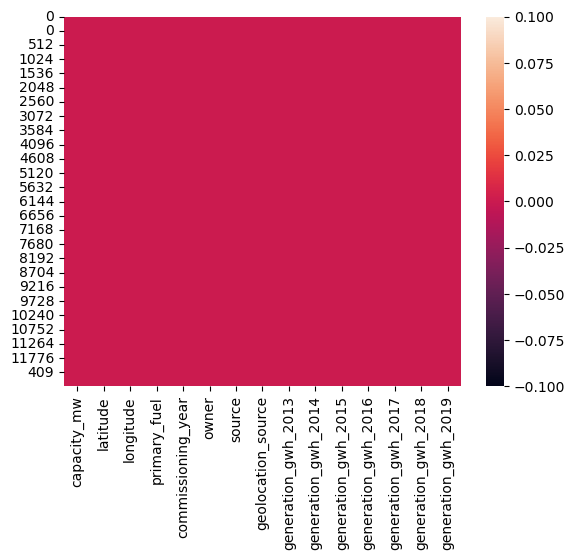

In [29]:
sns.heatmap(df.isnull())

<Axes: >

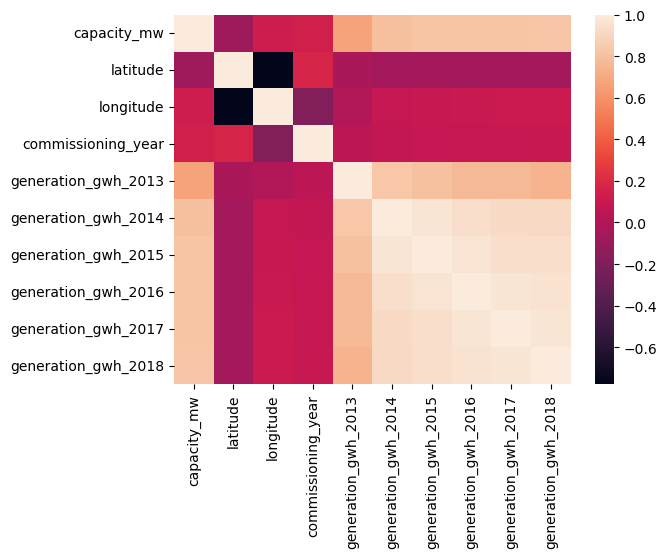

In [30]:
sns.heatmap(dfcor)

In [31]:
df["capacity_mw"].value_counts()

0.0      2030
5.0       552
1.0       534
2.0       479
1.5       267
         ... 
584.1       1
346.9       1
345.6       1
29.5        1
106.6       1
Name: capacity_mw, Length: 2304, dtype: int64

In [32]:
df["primary_fuel"].value_counts()

Solar           3480
Gas             2031
5.5             2004
Hydro           1783
Wind            1340
Oil              961
Waste            595
Coal             572
Biomass          230
Storage          104
Nuclear           72
Geothermal        65
Cogeneration      34
Other             16
Petcoke           11
Name: primary_fuel, dtype: int64

In [33]:
df["commissioning_year"].value_counts()

5.500000       2644
2017.000000     691
2019.000000     598
2018.000000     596
2016.000000     569
               ... 
1984.319444       1
2006.435897       1
1974.465556       1
2000.684211       1
2013.775510       1
Name: commissioning_year, Length: 1937, dtype: int64

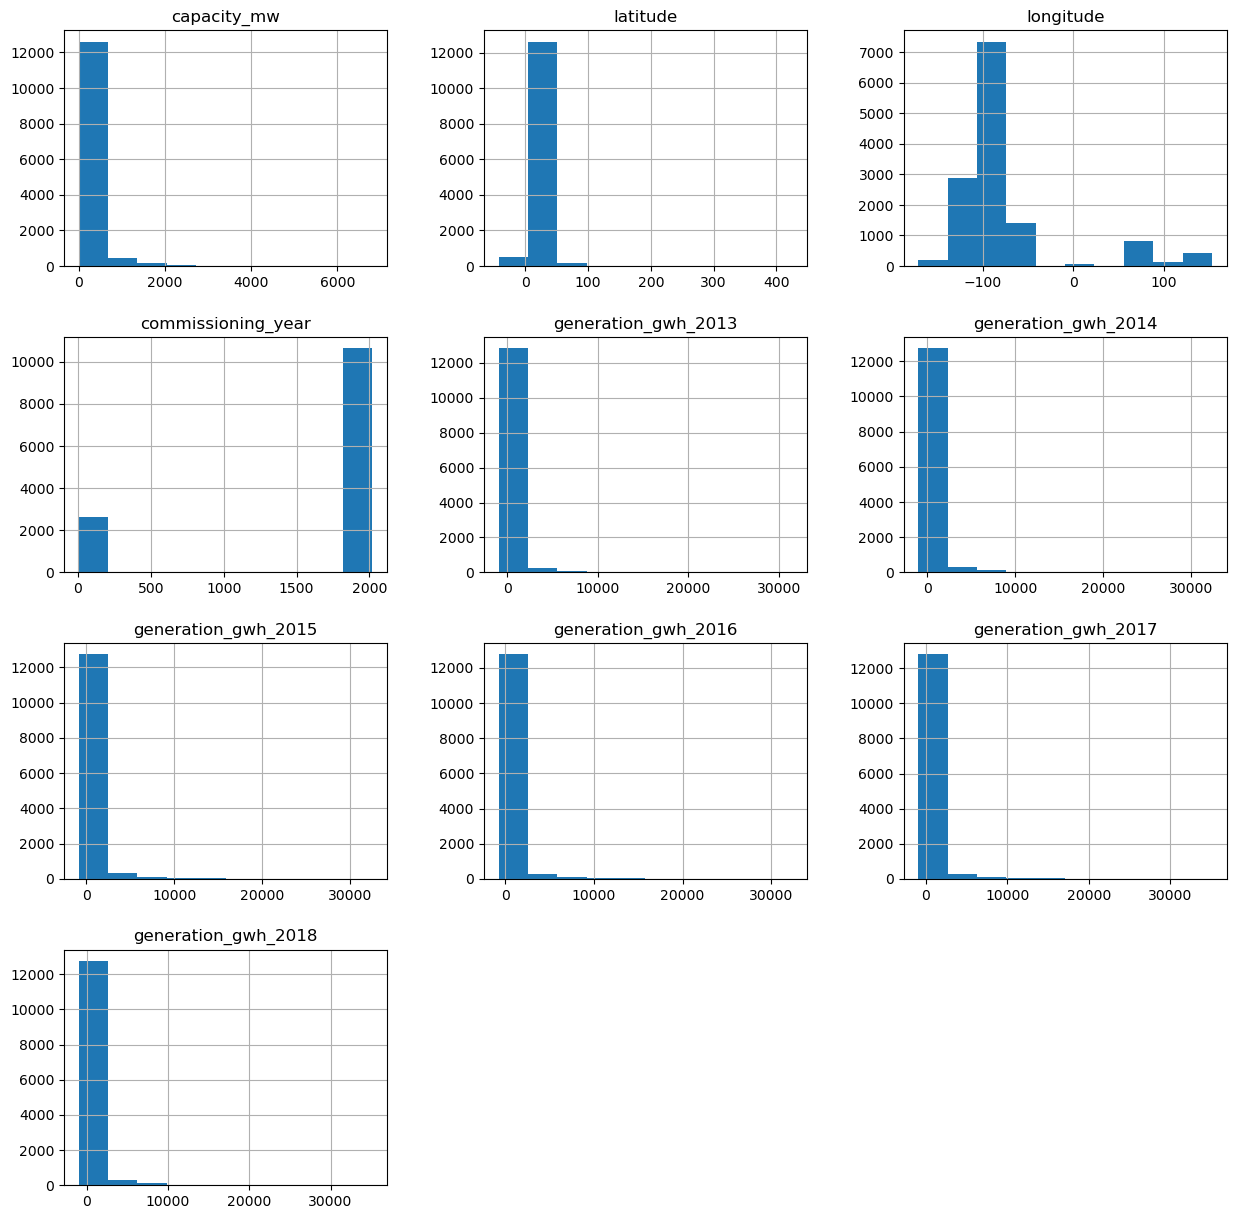

In [34]:
df.hist(figsize=(15,15))
plt.show()

<Axes: >

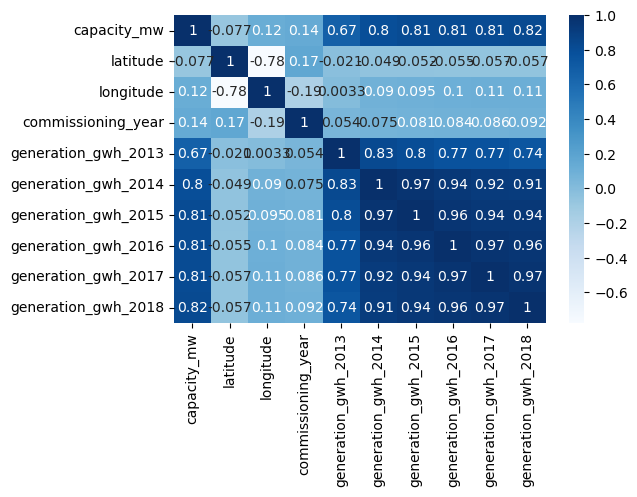

In [35]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap="Blues",annot=True)

# There is high corelation between capacity_mw and generation_gwh_2014-2015-2016-2017-2018

<Axes: >

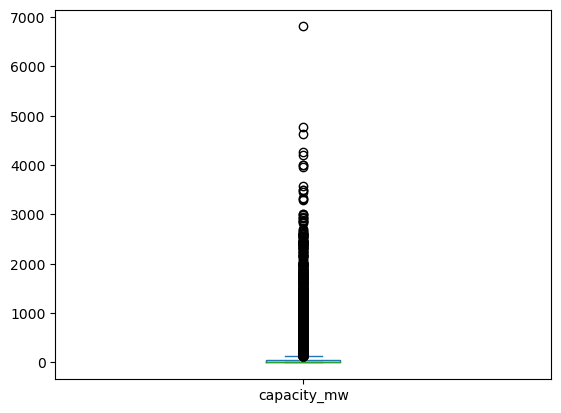

In [36]:
df["capacity_mw"].plot.box()

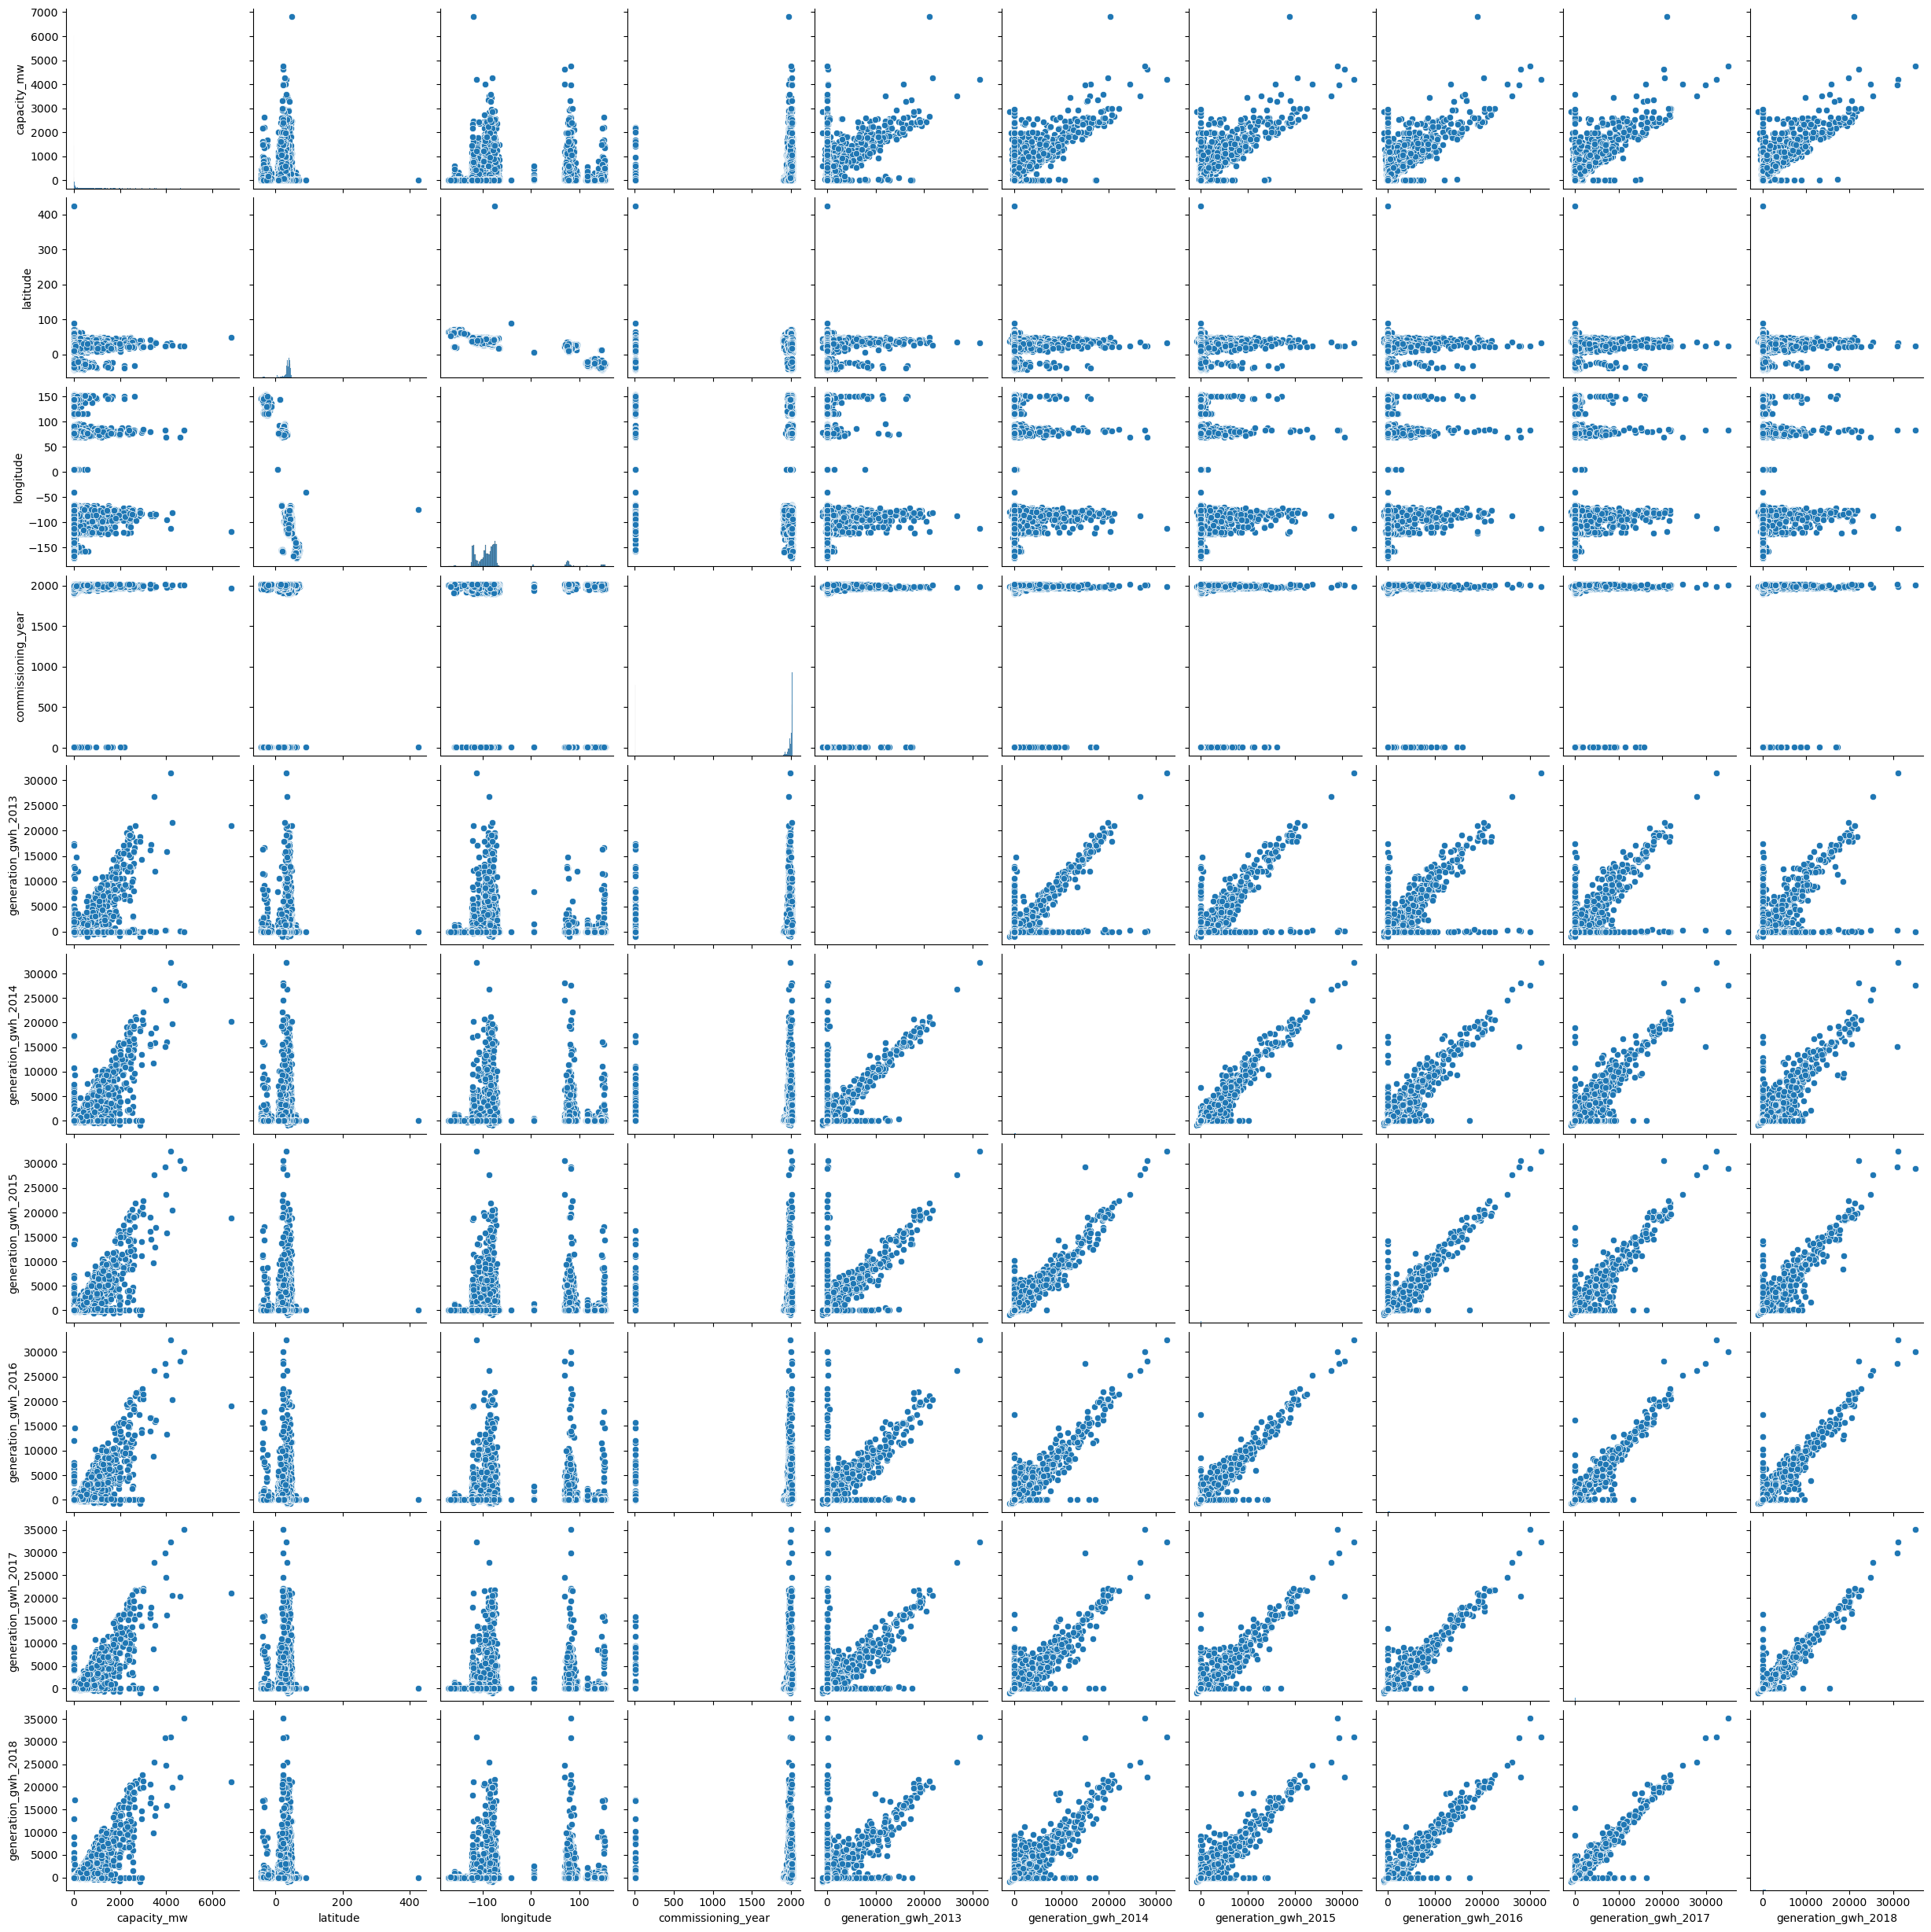

In [37]:
sns.pairplot(df)

<Axes: xlabel='primary_fuel', ylabel='count'>

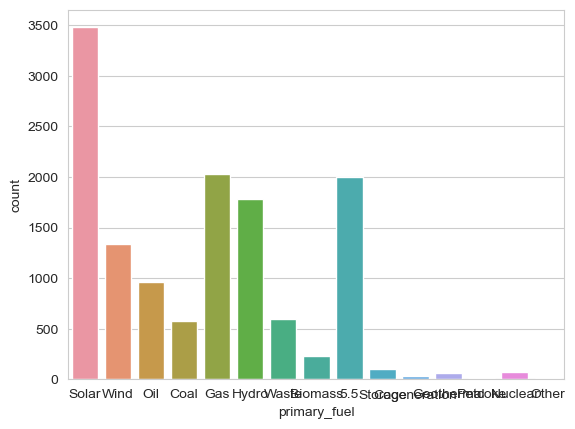

In [38]:
sns.set_style("whitegrid")
sns.countplot(x="primary_fuel", data=df)

<Axes: xlabel='capacity_mw', ylabel='count'>

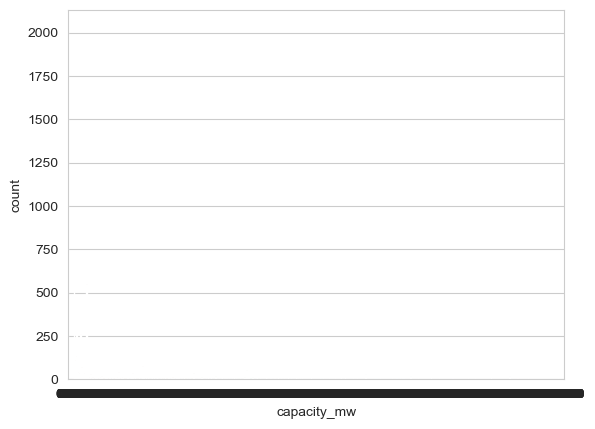

In [39]:
sns.set_style("whitegrid")
sns.countplot(x="capacity_mw", data=df)

<Axes: xlabel='generation_gwh_2013', ylabel='count'>

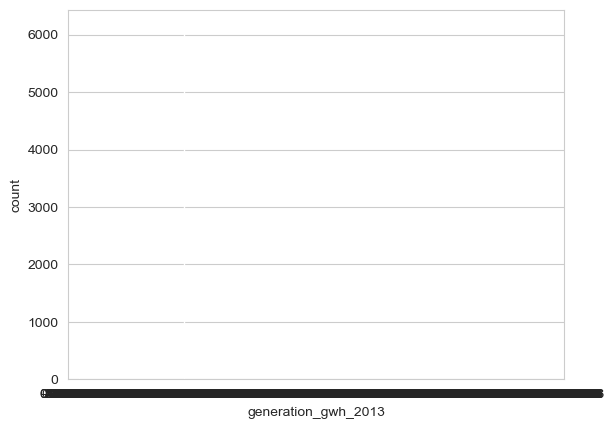

In [40]:
sns.set_style("whitegrid")
sns.countplot(x="generation_gwh_2013",data=df)

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2013'>

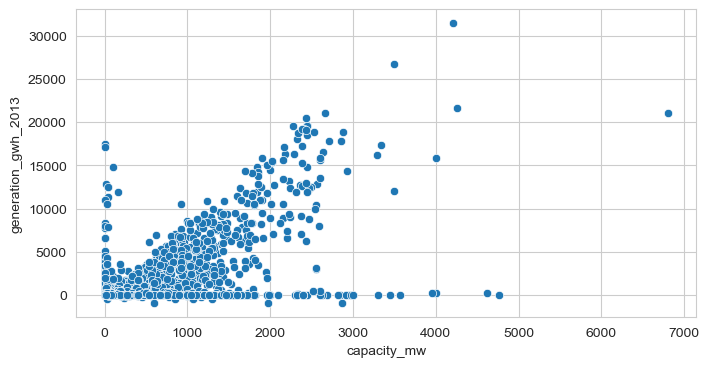

In [41]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2013',data=df)

In [42]:
df['geolocation_source'].unique()

array(['Australian Renewable Energy Mapping Infrastructure',
       'U.S. Energy Information Administration', 'WRI',
       'National Renewable Energy Laboratory', 'Industry About'],
      dtype=object)

In [43]:
df['primary_fuel'].unique()

array(['Solar', 'Wind', 'Oil', 'Coal', 'Gas', 'Hydro', 'Waste', 'Biomass',
       5.5, 'Storage', 'Cogeneration', 'Geothermal', 'Petcoke', 'Nuclear',
       'Other'], dtype=object)

capacity_mw               Axes(0.125,0.712609;0.0945122x0.167391)
latitude               Axes(0.238415,0.712609;0.0945122x0.167391)
longitude              Axes(0.351829,0.712609;0.0945122x0.167391)
commissioning_year     Axes(0.465244,0.712609;0.0945122x0.167391)
generation_gwh_2013    Axes(0.578659,0.712609;0.0945122x0.167391)
generation_gwh_2014    Axes(0.692073,0.712609;0.0945122x0.167391)
generation_gwh_2015    Axes(0.805488,0.712609;0.0945122x0.167391)
generation_gwh_2016       Axes(0.125,0.511739;0.0945122x0.167391)
generation_gwh_2017    Axes(0.238415,0.511739;0.0945122x0.167391)
generation_gwh_2018    Axes(0.351829,0.511739;0.0945122x0.167391)
dtype: object

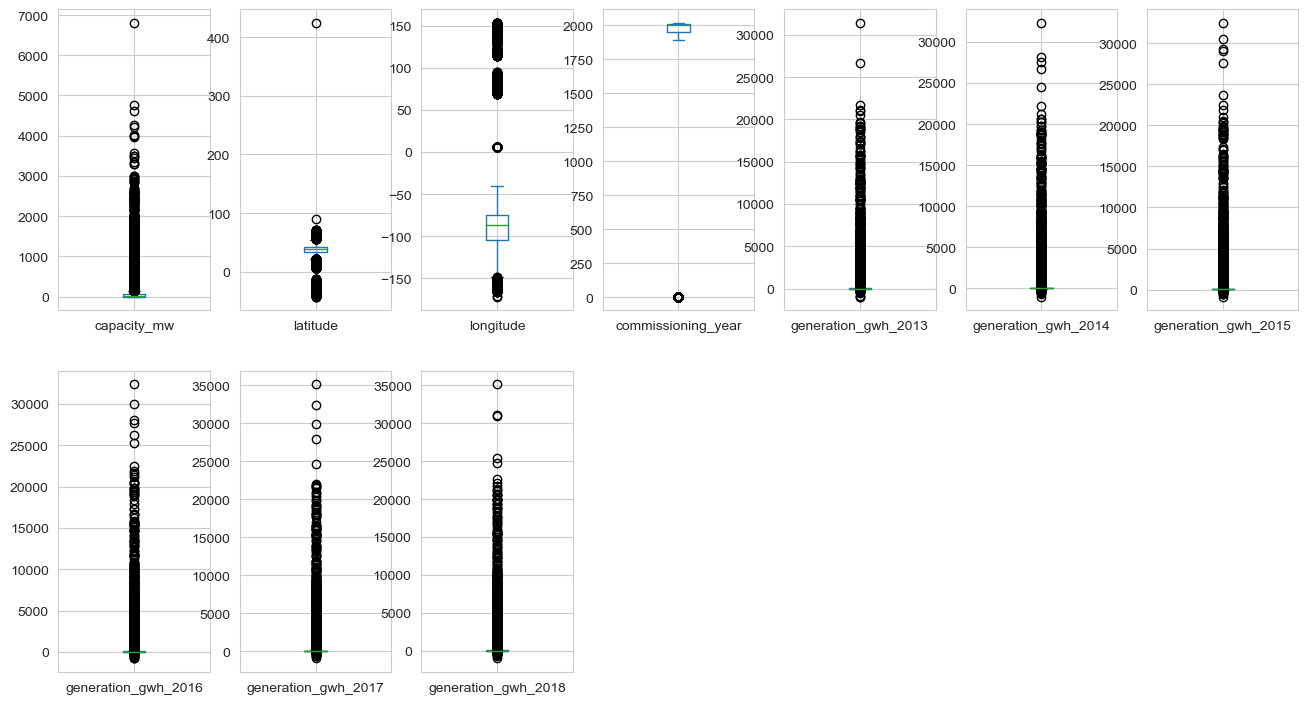

In [44]:
df.plot(kind="box",subplots=True,layout=(4,7),figsize=(16,18))

In [45]:
categorical_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="O":
        categorical_cols.append(x)
print(f"object data type columns are:\n",categorical_cols)

numerical_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="float64" or df.dtypes[x]=="int64":
        numerical_cols.append(x)
print(f"\nNumber Data Types Columns are:\n",numerical_cols)

object data type columns are:
 ['primary_fuel', 'owner', 'source', 'geolocation_source', 'generation_gwh_2019']

Number Data Types Columns are:
 ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


5.5                              3521
0.0                               366
0.001                              13
0.005                              12
0.003                               9
                                 ... 
331.152                             1
324.594                             1
150.639                             1
51.005                              1
Central Electricity Authority       1
Name: generation_gwh_2019, Length: 8368, dtype: int64


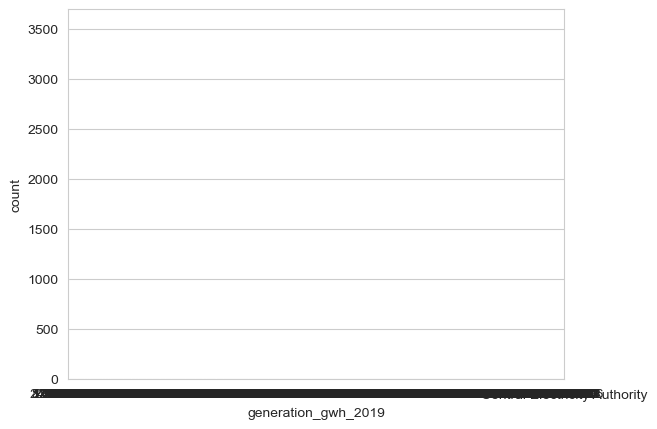

In [46]:
ax=sns.countplot(x="generation_gwh_2019",data=df[categorical_cols])
print(df["generation_gwh_2019"].value_counts())

<Axes: xlabel='capacity_mw', ylabel='primary_fuel'>

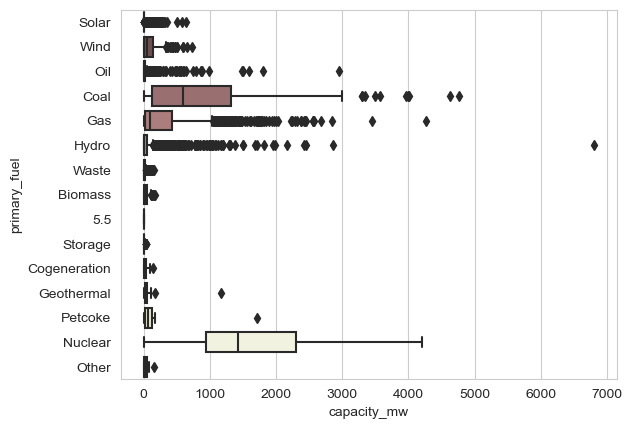

In [47]:
sns.boxplot(y="primary_fuel" ,x="capacity_mw", data=df, palette = 'pink')

<Axes: xlabel='commissioning_year', ylabel='primary_fuel'>

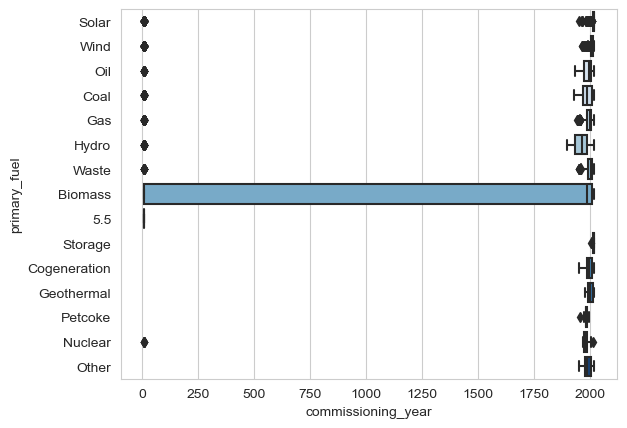

In [48]:
sns.boxplot(y="primary_fuel" ,x="commissioning_year", data=df, palette = 'Blues')

<Axes: xlabel='capacity_mw', ylabel='commissioning_year'>

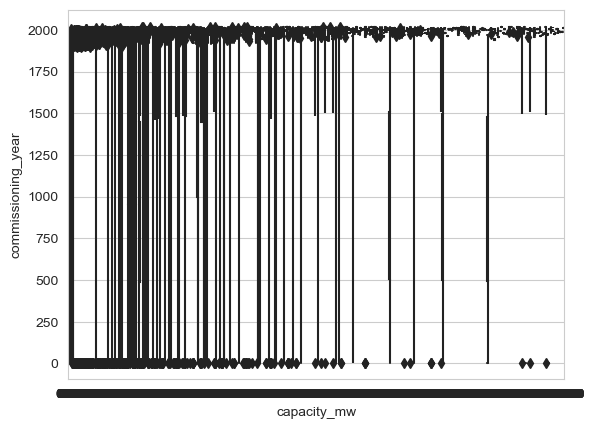

In [49]:
sns.boxplot(y="commissioning_year" ,x="capacity_mw", data=df, palette = 'Blues')

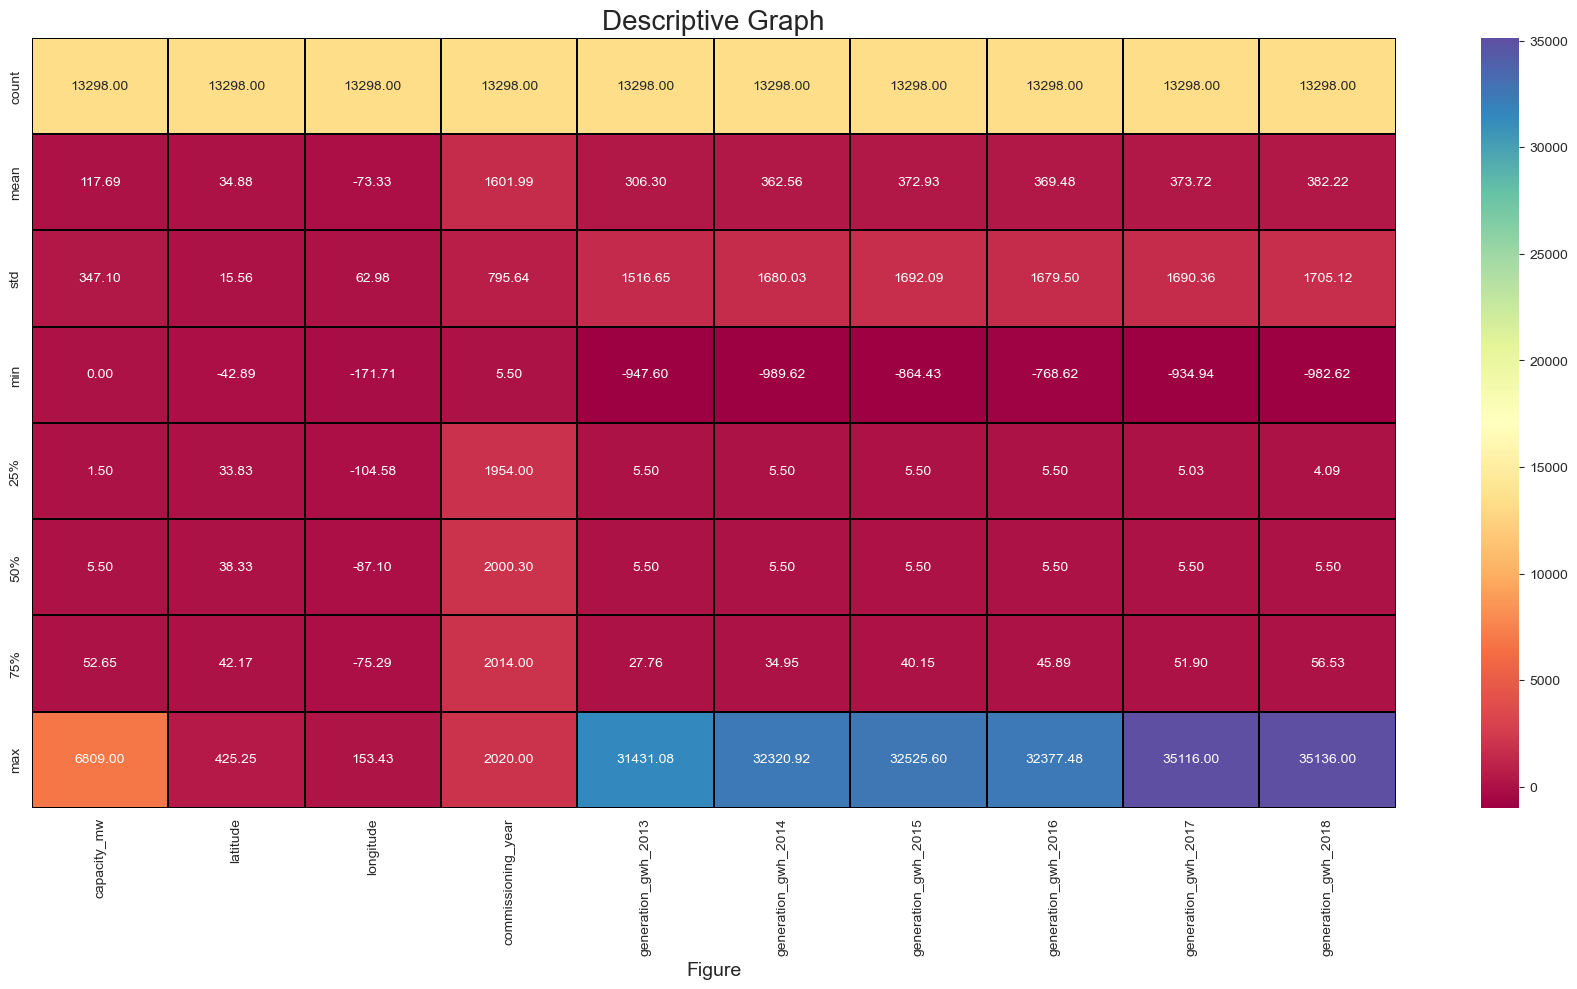

In [50]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt="0.2f",linewidth=0.2,linecolor="black",cmap="Spectral")
plt.xlabel("Figure",fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

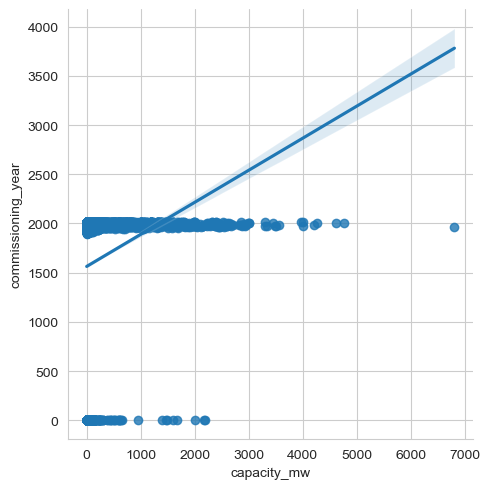

In [51]:
sns.lmplot(x="capacity_mw",y="commissioning_year",data=df,palette="colorblind")

In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [53]:
# Initialize LabelEncoder
le = LabelEncoder()

# Iterate over each categorical column and apply LabelEncoder
for col in categorical_cols:
    # Convert all elements in the column to string (if necessary)
    df[col] = df[col].astype(str)
    # Apply LabelEncoder
    df[col] = le.fit_transform(df[col])

In [54]:
for i in df[categorical_cols]:
    df[i]=le.fit_transform(df[i])
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0.11,-34.9387,138.5377,11,2011.0,141,12,0,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,6136
1,1.00,-34.9453,138.5882,11,5.5,142,12,0,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,6136
2,21.60,-35.0641,117.7977,14,5.5,5534,12,0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,6136
3,0.24,-23.7966,133.8971,11,2004.0,204,12,0,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,6136
4,4.00,-34.5509,138.7659,8,2015.0,1941,12,0,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,6136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.00,16.2949,77.3568,2,2016.0,27,24,4,5.500000,5.500000,0.994875,233.596650,865.400000,686.500000,6136
903,3.00,12.8932,78.1654,11,5.5,2839,83,1,1.925000,5.500000,5.500000,5.500000,5.500000,5.500000,6136
904,25.50,15.2758,75.5811,14,5.5,27,22,4,2.054000,5.500000,5.500000,5.500000,5.500000,5.500000,6136
905,80.00,24.3500,73.7477,2,5.5,2573,65,4,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,6136


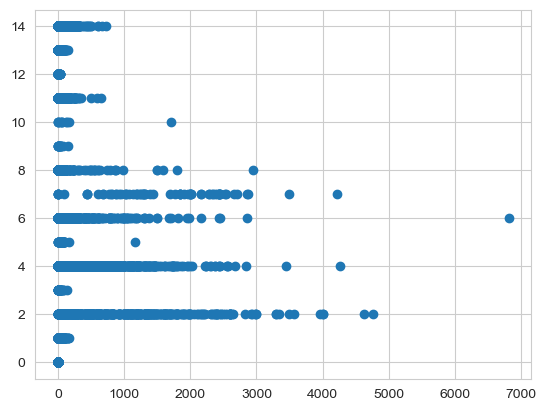

In [55]:
plt.scatter(df["capacity_mw"],df["primary_fuel"])

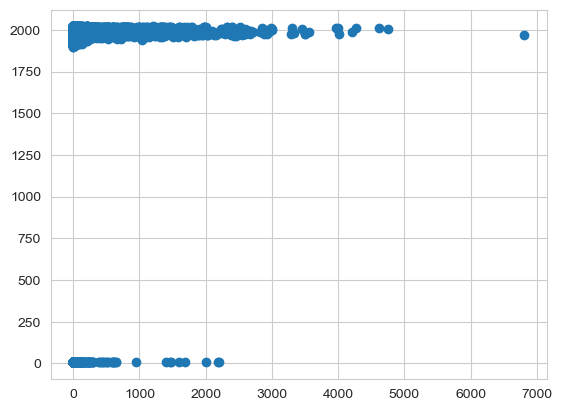

In [56]:
plt.scatter(df["capacity_mw"],df["commissioning_year"])

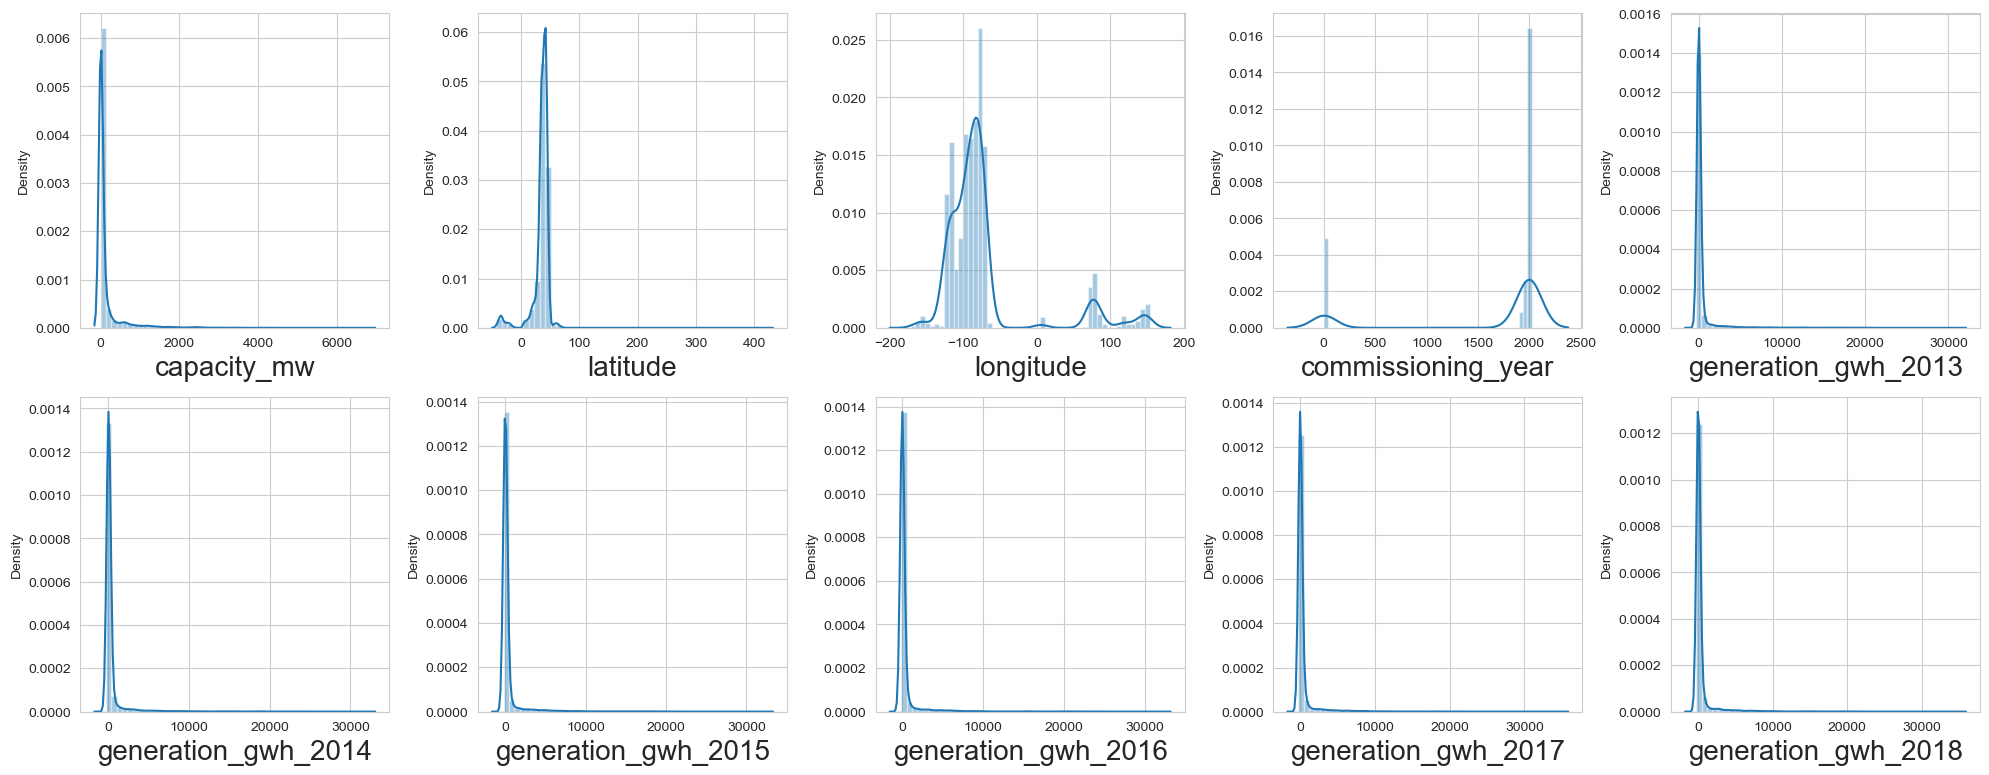

In [57]:
plt.figure(figsize=(20,15),facecolor="white")
plot_number=1
for column in df[numerical_cols]:
    if plot_number<=20:
        ax=plt.subplot(4,5,plot_number)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plot_number +=1
plt.tight_layout()

from above pattern It can be seen that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. The distribution is right-skewed (positive skewness). Now We will try to make it normal as algorithms works better if the data is normally distributed.

# Removing Outliers with the help of zscore

In [58]:
from scipy.stats import zscore
z=np.abs(zscore(df[["generation_gwh_2013","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","generation_gwh_2018","generation_gwh_2019"]]))
z

,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0.198338,0.212542,0.217156,0.216728,0.217845,0.220944,0.703432
1,0.198338,0.212542,0.217156,0.216728,0.217845,0.220944,0.703432
2,0.142888,0.154717,0.163341,0.162917,0.170279,0.169812,0.703432
3,0.198338,0.212542,0.217156,0.216728,0.217845,0.220944,0.703432
4,0.198338,0.212542,0.217156,0.216728,0.217845,0.220944,0.703432
...,...,...,...,...,...,...,...
902,0.198338,0.212542,0.219818,0.080911,0.290882,0.178458,0.703432
903,0.200695,0.212542,0.217156,0.216728,0.217845,0.220944,0.703432
904,0.200610,0.212542,0.217156,0.216728,0.217845,0.220944,0.703432
905,0.198338,0.212542,0.217156,0.216728,0.217845,0.220944,0.703432


In [59]:
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (13298, 15)
Shape of the dataframe after removing outliers:  (12927, 15)
Percentage of data loss post outlier removal:  2.7898932170251167


In [60]:
df=df1.copy()

In [61]:
df.shape

(12927, 15)

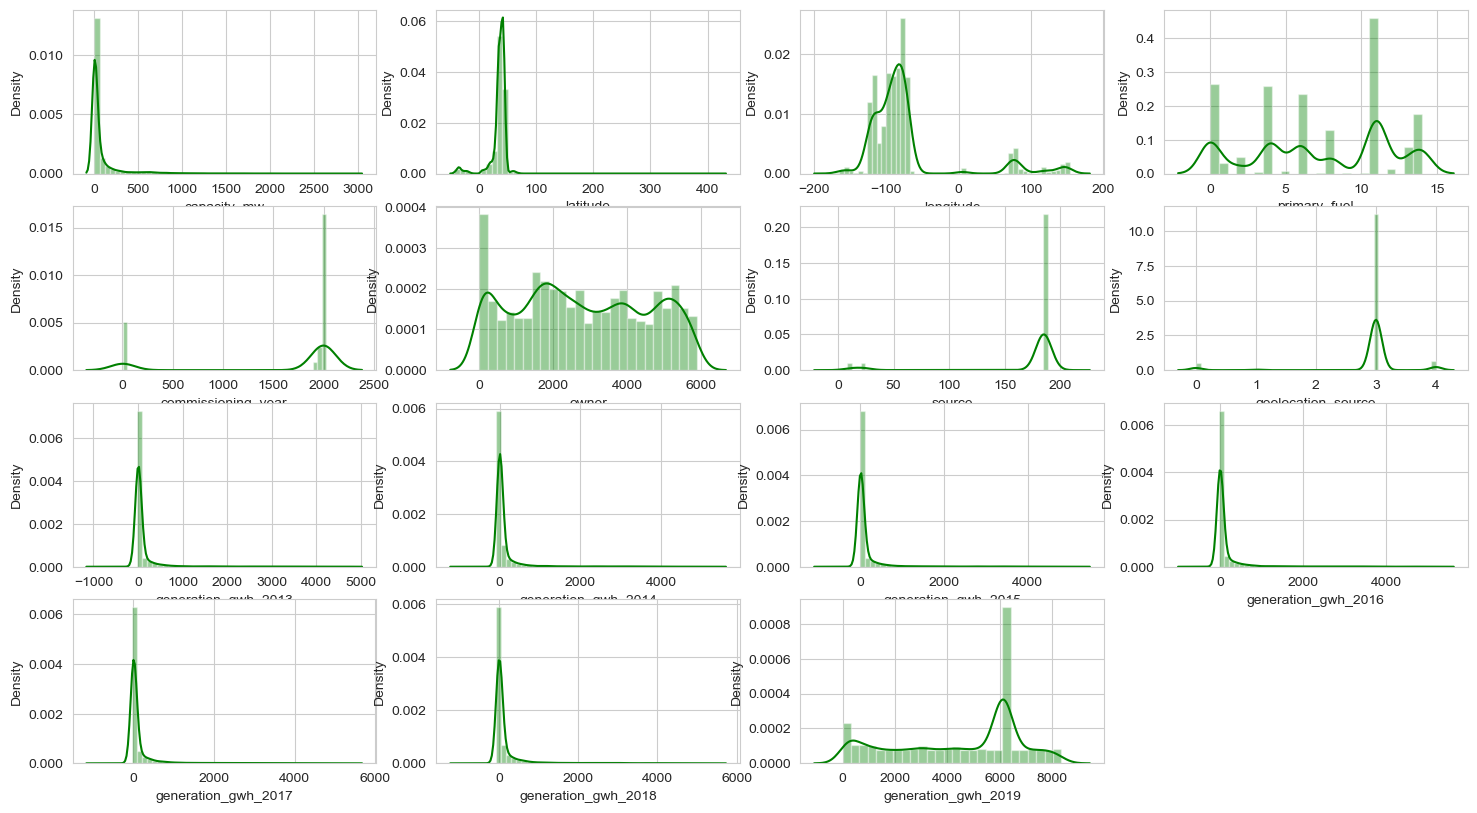

In [62]:
plt.figure(figsize=(18,20))
for i in enumerate(df):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

# Here we import libraries which is useful for further process

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# first we take  'primary_fuel' as target , creating classification model Dividing data into x and y

In [65]:
columns_to_drop = ["primary_fuel"]
x = df.drop(columns_to_drop, axis=1)  # Use axis=1 to drop columns

# Create `y` containing only the dropped columns
y = df[columns_to_drop]

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [66]:
print("Size of x_train :",x_train.shape)
print("Size of x_test :",x_test.shape)
print("Size of x_train :",y_train.shape)
print("Size of x_train :",y_test.shape)

Size of x_train : (9695, 14)
Size of x_test : (3232, 14)
Size of x_train : (9695, 1)
Size of x_train : (3232, 1)


In [67]:
def classify(clf,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=95)
    
    #training the model
    clf.fit(x_train,y_train)
    
    #predicting Y_Test
    pred=clf.predict(x_test)
    
    #Accuracy Score
    acc_score =(accuracy_score(y_test,pred))
    print ("Accuracy Score:",acc_score)
    
    #confusion matrix:
    print("confusion matrix:\n",confusion_matrix(y_test,pred))
    
    #classification report
    class_report=classification_report(y_test,pred)
    print("\nClassification Report:\n",class_report)
    
    #cross validation score
    cv_score =(cross_val_score(clf,x,y,cv=5).mean())
    print("Cross Validation Score:",cv_score)
    
    #result of accuracy minus cv scores
    result=acc_score-cv_score
    print("\nAccuracy Score - Cross Validation Score is ",result)

In [68]:
clf=LogisticRegression()
classify(clf,x,y)

Accuracy Score: 0.5374381188118812
confusion matrix:
 [[509   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 13   0   1   0   2   0  16   2   0   0  25   0   0   2]
 [ 12   0   7   0  42   0  14   2   0   0   6   0   0   8]
 [  0   0   0   0   1   0   2   0   0   0   5   0   0   0]
 [  3   0  14   0 204   0  63  40   0   0 173   0   0  12]
 [  0   0   0   0   3   0   8   1   0   0   2   0   0   0]
 [  4   0   8   0  42   0 121   7   0   0 218   0   0  14]
 [  4   0   0   0   7   0   9  51   0   0 164   0   0   2]
 [  0   0   0   0   1   0   1   0   0   0   2   0   0   0]
 [  0   0   0   0   1   0   0   0   0   0   2   0   0   0]
 [ 23   0   0   0  13   0  26  11   0   0 821   0   0   6]
 [  0   0   0   0   0   0   0  12   0   0  14   0   0   0]
 [  1   0   0   0   3   0  32   3   0   0  84   0   0   4]
 [ 18   0   2   0 107   0  59   1   0   0 118   0   0  24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      

In [69]:
clf=DecisionTreeClassifier()
classify(clf,x,y)

Accuracy Score: 0.7750618811881188
confusion matrix:
 [[505   0   0   0   2   0   0   1   0   0   0   1   0   0   0]
 [  1  22   2   0   8   0   9   0   1   1   0   6   0   6   5]
 [  0   3  51   0  26   0   5   0   2   0   0   1   0   2   1]
 [  0   0   0   1   1   0   1   0   0   0   1   1   0   1   2]
 [  0  11  20   3 319   2  35   0  40   2   0  17   2  32  26]
 [  0   0   0   0   3   5   0   0   0   0   0   0   1   1   4]
 [  1   4  11   1  32   1 315   0  16   1   0  10   1  18   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   1   3   0  41   0  11   0 166   2   0   5   1   4   2]
 [  0   0   0   0   0   0   3   0   0   0   0   0   0   1   0]
 [  0   1   1   0   1   0   0   0   0   0   0   0   0   0   0]
 [  1   8   0   0  19   2   9   0   8   0   0 806   4  20  23]
 [  0   0   0   0   1   0   0   0   0   1   0   4  20   0   0]
 [  1   6   0   0  25   3   5   1  10   0   0   8   0  60   8]
 [  0   1   1   1  28   3  11   0   8   0   0  29   3   9 235]]


In [70]:
clf=RandomForestClassifier()
classify(clf,x,y)

Accuracy Score: 0.848700495049505
confusion matrix:
 [[509   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1  22   2   0  10   0  10   1   0   0   4   0   7   4]
 [  0   2  50   0  25   0   6   3   0   0   0   0   4   1]
 [  0   0   0   0   4   0   1   1   0   0   1   0   0   1]
 [  1   0  11   0 374   2  32  33   0   0  23   0  18  15]
 [  0   0   0   0   5   5   1   0   0   0   2   0   1   0]
 [  1   1   4   0  19   0 368   2   0   0   6   0   7   6]
 [  1   1   1   0  30   0  13 183   0   0   7   0   0   1]
 [  0   0   0   0   1   0   3   0   0   0   0   0   0   0]
 [  0   0   0   0   2   0   0   0   0   0   0   0   1   0]
 [  1   0   0   0   4   0   1   4   0   0 872   0   3  15]
 [  0   0   0   0   0   0   0   0   0   0   4  22   0   0]
 [  1   0   0   0  22   3   2   5   0   0   9   0  77   8]
 [  0   0   0   0  12   0   8   4   0   0  40   0   4 261]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0

In [71]:
clf=SVC()
classify(clf,x,y)

Accuracy Score: 0.5476485148514851
confusion matrix:
 [[509   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 19   0   0   0   1   0   6   3   0   0  23   0   0   9]
 [ 20   0   7   0  35   0  10   2   0   0  10   0   0   7]
 [  0   0   0   0   0   0   1   1   0   0   5   0   0   1]
 [ 18   0   5   0 153   0  29  49   0   0 226   0   0  29]
 [  0   0   0   0   0   0   3   3   0   0   6   0   0   2]
 [ 12   0   7   0  17   0  61  17   0   0 270   0   0  30]
 [ 10   0   0   0   5   0   0 149   0   0  73   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   3   0   0   1]
 [  0   0   0   0   0   0   0   0   0   0   3   0   0   0]
 [ 26   0   0   0   0   0   3  44   0   0 820   0   0   7]
 [  0   0   0   0   0   0   0  20   0   0   6   0   0   0]
 [  4   0   0   0   0   0  13   7   0   0  97   0   0   6]
 [ 38   0   0   0  11   0  49   8   0   0 152   0   0  71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      

In [72]:
clf=KNeighborsClassifier()
classify(clf,x,y)

Accuracy Score: 0.6079826732673267
confusion matrix:
 [[508   0   0   0   0   0   1   0   0   0   0   0   0   0]
 [  2  11   2   0   8   1  10   1   0   0  12   0   0  14]
 [  1   0  40   0  28   0   6   1   0   0   7   0   1   7]
 [  0   0   0   0   0   1   2   1   0   0   3   0   0   1]
 [  2   5  28   2 209   3  78  37   0   0  89   2  12  42]
 [  0   0   0   1   3   1   4   0   0   0   3   0   1   1]
 [  2   6  13   0  56   5 205   5   0   0  77   1  11  33]
 [  1   2   1   0  35   0  14 146   0   0  33   3   0   2]
 [  0   0   0   0   2   0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   1   0   0   0   0   0   2   0   0   0]
 [  1   9   5   0  64   2  57  33   0   0 686   0  20  23]
 [  0   0   0   0   5   0   2   6   0   0   7   6   0   0]
 [  1   5   0   1  15   0  24   8   0   0  33   0  25  15]
 [  0   8   3   0  29   0  57  11   0   0  81   0  12 128]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      

In [73]:
import xgboost as xgb

In [74]:
clf=xgb.XGBClassifier()
classify(clf,x,y)

Accuracy Score: 0.8681930693069307
confusion matrix:
 [[509   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1  31   2   0   5   0   8   1   0   0   5   0   7   1]
 [  0   3  52   0  23   0   6   2   0   0   0   0   4   1]
 [  0   0   0   0   4   0   1   0   0   0   1   0   1   1]
 [  1   1  13   0 392   0  19  35   0   0  17   0  16  15]
 [  0   0   0   0   2   9   0   1   0   0   1   0   1   0]
 [  1   1   4   0  14   0 376   2   0   0   7   0   6   3]
 [  1   1   2   0  32   0   9 186   0   0   3   0   1   2]
 [  0   0   0   0   3   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   2   0   0   0   0   0   0   0   1   0]
 [  1   1   0   0   3   0   2   2   1   0 878   0   1  11]
 [  0   0   0   0   0   0   0   1   0   0   3  21   0   1]
 [  1   0   0   0  24   1   5   4   0   0   7   0  79   6]
 [  0   0   0   0  11   0   6   6   0   0  31   0   2 273]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      

In [75]:
clf=GradientBoostingClassifier()
classify(clf,x,y)

Accuracy Score: 0.8304455445544554
confusion matrix:
 [[505   0   0   1   1   0   1   0   0   0   1   0   0   0   0]
 [  1  22   4   1   7   0   9   0   1   0   0   8   0   4   4]
 [  0   2  49   0  22   0  10   0   5   0   0   0   0   2   1]
 [  0   0   0   0   5   0   1   0   0   0   0   1   0   0   1]
 [  1   3  14   2 355   1  23   0  36   1   0  30   2  19  22]
 [  0   0   0   0   3   8   2   0   0   0   0   1   0   0   0]
 [  1   4   5   0  15   0 365   1   3   0   0   8   0   5   7]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   2   2  37   0  12   0 172   0   0   7   1   0   3]
 [  0   0   0   0   1   0   2   0   0   0   0   0   0   1   0]
 [  0   0   0   0   2   0   1   0   0   0   0   0   0   0   0]
 [  1   2   1   1   8   1   3   0   2   0   0 868   0   1  12]
 [  0   0   0   0   0   0   0   0   0   1   0   6  19   0   0]
 [  1   1   2   0  19   1   9   0   5   1   0  16   0  68   4]
 [  0   0   1   0  17   1   5   0   3   0   0  45   0   4 253]]


# From above data RandomForestClassifier,GradientBoostingClassifier,XGB Classifier are giving high accuracy score or performing best 

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [77]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print("R2_score:",r2_score(y_test,pred_LR))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_LR))
print("Mean Squared Error:",mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score: 0.41130927235267634
R2_score on training Data: 41.47535689997943
Mean Absolute Error: 2.9462668520788418
Mean Squared Error: 12.578083501075643
Root Mean Squared Error: 3.546559389193369


In [78]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

In [79]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,pred))
print("Confusion Matrix\n",confusion_matrix(y_test,pred))
print("Classification Report:\n",classification_report(y_test,pred))

Accuracy Score: 0.843440594059406
Confusion Matrix
 [[480   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  13   1   0  10   0   4   0   2   0   9   0   4   5]
 [  0   4  46   0  25   0  17   0   1   0   0   0   1   0]
 [  0   0   0   0   6   0   0   0   1   0   0   0   0   0]
 [  1   2   6   0 359   0  30   0  45   0  23   0  14  19]
 [  0   0   0   0   4   1   2   0   0   0   2   0   1   7]
 [  1   0   4   0  13   0 398   0   4   0   8   0   8   3]
 [  1   0   1   0   1   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0  28   0   7   0 198   0   9   0   0   0]
 [  0   0   0   0   2   0   3   0   0   0   0   0   0   0]
 [  2   1   0   0   2   0   5   0   2   0 863   0   1  13]
 [  0   0   0   0   0   0   0   0   0   0   4  22   0   0]
 [  2   2   1   0  22   0  14   0   5   0  13   0  89   8]
 [  0   0   0   0  19   0   9   0   3   0  35   0   2 257]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.9

In [80]:
rf_final = RandomForestClassifier(criterion="entropy", max_depth=20, min_samples_leaf=3,
                                   min_samples_split=10, n_estimators=200, random_state=420)
rf_final.fit(x_train,y_train)
predrf=rf_final.predict(x_test)
print("accuracy:",accuracy_score(y_test,predrf))
print("confusion matrix:\n",confusion_matrix(y_test,predrf))
print("classification report:\n",classification_report(y_test,predrf))

accuracy: 0.8276608910891089
confusion matrix:
 [[480   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  12   1   0  10   0   6   0   2   0   7   0   2   8]
 [  0   3  42   0  25   0  19   0   0   0   2   0   1   2]
 [  0   0   0   0   6   0   0   0   1   0   0   0   0   0]
 [  1   0   9   0 336   0  35   0  55   0  26   0  14  23]
 [  0   0   0   0   5   0   4   0   0   0   2   0   1   5]
 [  1   1   3   0  15   0 395   0   4   0   8   0   9   3]
 [  1   0   1   0   1   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0  29   0   7   0 196   0   7   1   0   1]
 [  0   0   0   0   2   0   3   0   0   0   0   0   0   0]
 [  2   1   0   0   5   0   5   0   3   0 863   0   0  10]
 [  0   0   0   0   0   0   0   0   0   0   6  20   0   0]
 [  2   2   0   0  25   0  14   0   4   0  15   0  84  10]
 [  0   0   0   0  20   0  10   0   3   0  43   0   2 247]]
classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99   

# Now we take  'capacity_mw' as target , creating  model Dividing data into x and y

In [81]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=42)

In [82]:
print("Size of x_train :",x_train.shape)
print("Size of x_test :",x_test.shape)
print("Size of x_train :",y_train.shape)
print("Size of x_train :",y_test.shape)

Size of x_train : (9436, 14)
Size of x_test : (3491, 14)
Size of x_train : (9436,)
Size of x_train : (3491,)


In [83]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.4619736747688842


In [84]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 22044.334564472934
MAE: 62.832410449480726
r2_score: -0.13987456512897167


#Now we importing libraries for classification and prediction 

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

In [86]:
def classify(clf,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.27,random_state=42)
    
    #training the model
    clf.fit(x_train,y_train)
    
    #predicting Y_Test
    pred=clf.predict(x_test)
    
    #Accuracy Score
    acc_score =(accuracy_score(y_test,pred))
    print ("Accuracy Score:",acc_score)
    
    #confusion matrix:
    print("confusion matrix:\n",confusion_matrix(y_test,pred))
    
    #classification report
    class_report=classification_report(y_test,pred)
    print("\nClassification Report:\n",class_report)
    
    #cross validation score
    cv_score =(cross_val_score(clf,x,y,cv=5).mean())
    print("Cross Validation Score:",cv_score)
    
    #result of accuracy minus cv scores
    result=acc_score-cv_score
    print("\nAccuracy Score - Cross Validation Score is ",result)

#in above python function is designed to train a classifier (clf) using the input features (x) and target labels (y), split the data into training and testing sets, train the classifier on the training data, and then make predictions on the test data.

In [87]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.9472564809589472


#RandomForestRegressor is a class provided by scikit-learn for constructing a Random Forest model specifically for regression tasks. Random Forest is an ensemble learning method that constructs a multitude of decision trees during training and outputs the average prediction of the individual trees for regression tasks

In [88]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [91]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

0.9999996264801068


#DecisionTreeRegressor module give best accuracy rate 

In [92]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.7026456106918502


In [100]:
LR_predict=LR.predict(x_test)

In [101]:
x_test

,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
7167,30.0000,-90.0000,0,5.500000,171,185,3,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,6136
562,23.1689,68.6975,14,5.500000,27,22,4,381.732000,5.500000,5.500000,5.500000,5.500000,5.500000,6136
9660,35.2431,-78.3869,11,2014.000000,4814,185,3,5.500000,5.218000,9.111000,9.350000,9.215000,8.825000,7803
1035,37.3230,-118.5017,6,1906.756098,4851,185,3,24.134000,25.145000,23.841000,23.688000,30.865000,47.531000,5989
7406,45.4720,-123.1290,11,2019.000000,3801,185,3,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8661,40.8158,-73.0640,4,1994.000000,3655,185,3,1208.041001,1207.777006,1011.789008,1166.967001,968.552001,645.840005,5150
8775,30.3050,-97.7077,4,2006.000000,375,185,3,27.802000,26.993000,27.665000,28.311000,28.608000,28.767000,3920
2303,33.4045,-96.0825,0,5.500000,424,185,3,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,6136
4694,42.4338,-75.4216,0,5.500000,2551,185,3,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,6136


In [102]:
y_test

7167      0.0
562      51.0
9660      5.0
1035      8.2
7406      2.2
        ...  
8661    164.0
8775      6.1
2303      0.0
4694      0.0
2027     11.3
Name: capacity_mw, Length: 3491, dtype: float64

In [103]:
pred=LR.predict(x_test)
pred

array([  7.45986211, -20.18103142,  48.7622501 , ...,   4.11038221,
         6.40987206,  49.26103173])

# now we are saving are model in joblib

In [106]:
import joblib

In [113]:
joblib.dump(RandomForestRegressor, "capacity_mw.obj")

['capacity_mw.obj']

In [114]:
capacity_mw=joblib.load("capacity_mw.obj")

In [115]:
prediction=capacity_mw(x_test)


In [116]:
prediction

RandomForestRegressor(n_estimators=      latitude  longitude  primary_fuel  commissioning_year  owner  source  \
7167   30.0000   -90.0000             0            5.500000    171     185   
562    23.1689    68.6975            14            5.500000     27      22   
9660   35.2431   -78.3869            11         2014.000000   4814     185   
1035   37.3230  -118.5017             6         1906.756098   4851     185   
7406   45.4720  -123.1290            11         2019.000000   3801     185   
...        ...        ...           ...                 ...    ...     ...   
8661   40.8158   -73.0640             4         1994.000000   3655     185   
8775   30.3050   -97...
8661          1011.789008          1166.967001           968.552001   
8775            27.665000            28.311000            28.608000   
2303             5.500000             5.500000             5.500000   
4694             5.500000             5.500000             5.500000   
2027            27.548000            27.372000            25.426000   

      generation_gwh_2018  generation_gwh_2019  
7167             5.500000                 6136  
562              5.500000                 6136  
9660             8.825000                 7803  
1035            47.531000                 5989  
7406             5.500000                  463  
...                   ...                  ...  
8661           645.840005                 5150  
8775            28.767000                 3920  
2303             5.500000                 6136  
4694             5.500000                 6136  
2027            26.914000                 3830  

[3491 rows x 14 columns])

In [119]:
prediction=capacity_mw(y_test)
prediction

RandomForestRegressor(n_estimators=7167      0.0
562      51.0
9660      5.0
1035      8.2
7406      2.2
        ...  
8661    164.0
8775      6.1
2303      0.0
4694      0.0
2027     11.3
Name: capacity_mw, Length: 3491, dtype: float64)

In [120]:
y_test

7167      0.0
562      51.0
9660      5.0
1035      8.2
7406      2.2
        ...  
8661    164.0
8775      6.1
2303      0.0
4694      0.0
2027     11.3
Name: capacity_mw, Length: 3491, dtype: float64